In [ ]:
print('hello')

hello


In [1]:
!nvidia-smi

Thu Jan 23 04:44:33 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 31.1/235.7 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("starter-3re5h").project("gap-pattern-kjvnx")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to gap-pattern-3 in yolov11:: 100%|██████████| 1908/1908 [00:00<00:00, 8198.02it/s]


In [8]:
# used 0.71 compute units
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data=/content/datasets/gap-pattern-3/data.yaml epochs=75 batch=64 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.65 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/datasets/gap-pattern-3/data.yaml, epochs=75, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [9]:
!ls {HOME}/runs/detect/train3/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch975.jpg
confusion_matrix.png				     R_curve.png       train_batch976.jpg
events.out.tfevents.1737608352.666eb5d73f07.10533.0  results.csv       train_batch977.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


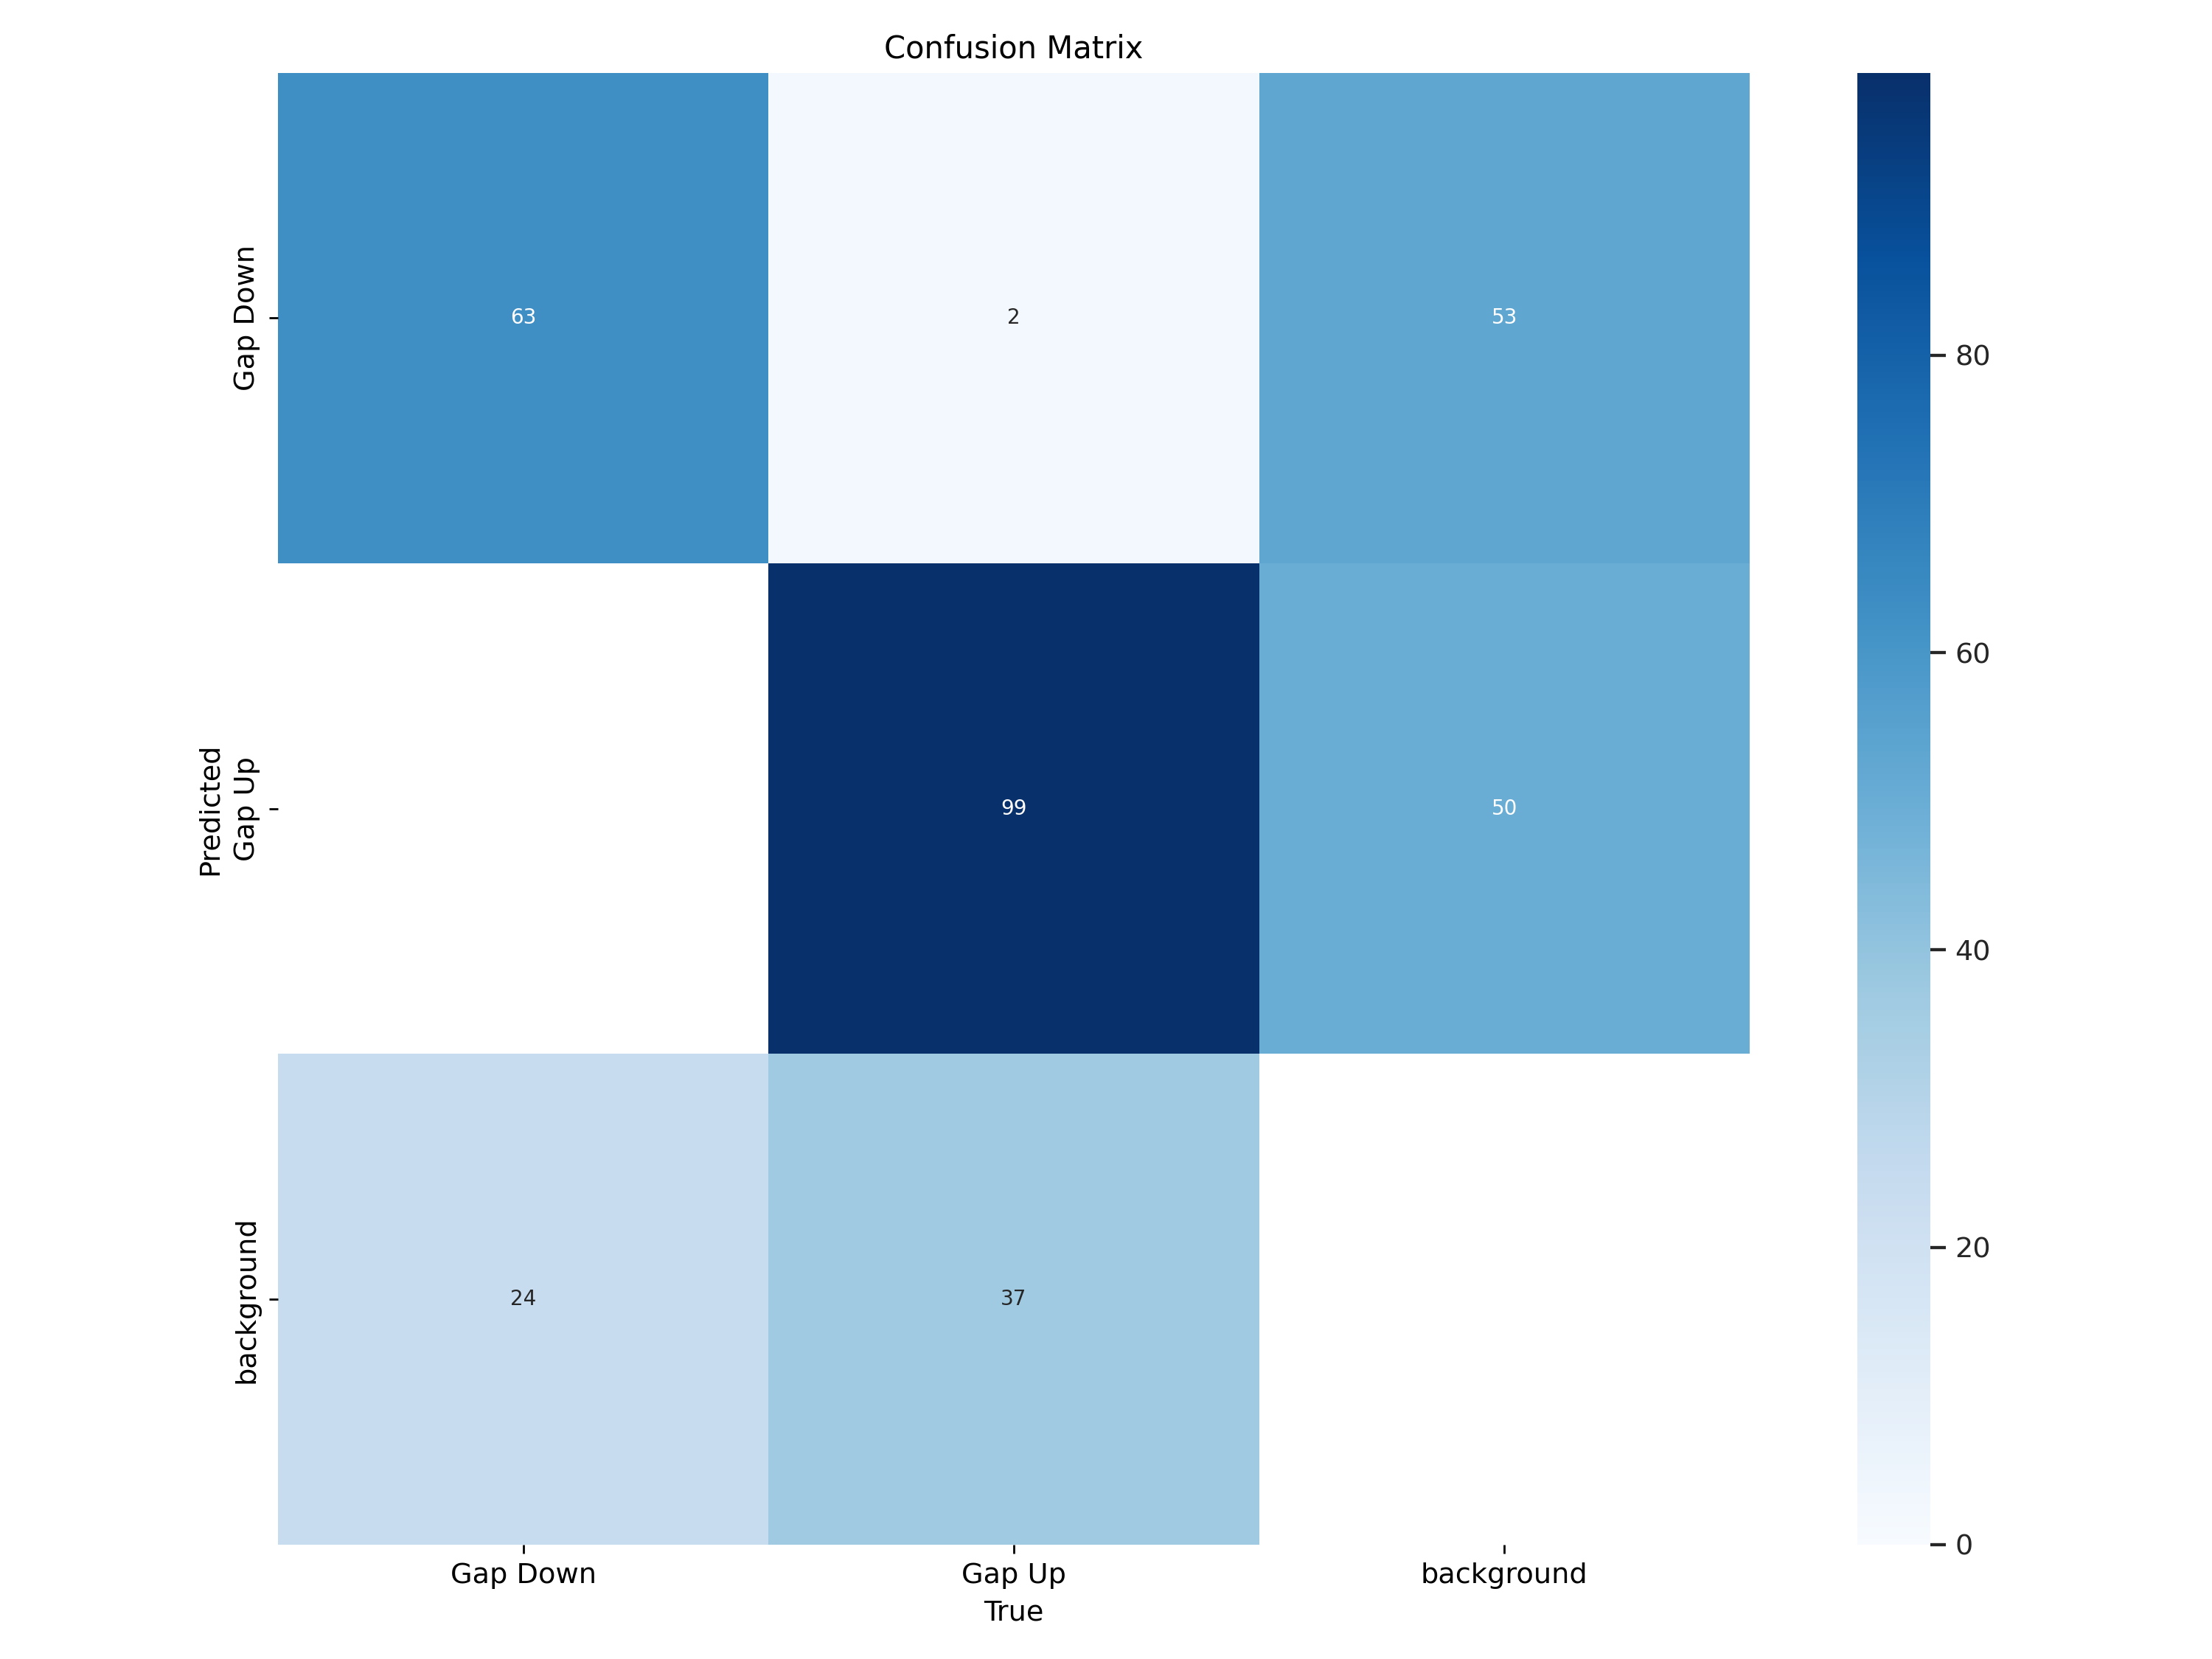

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

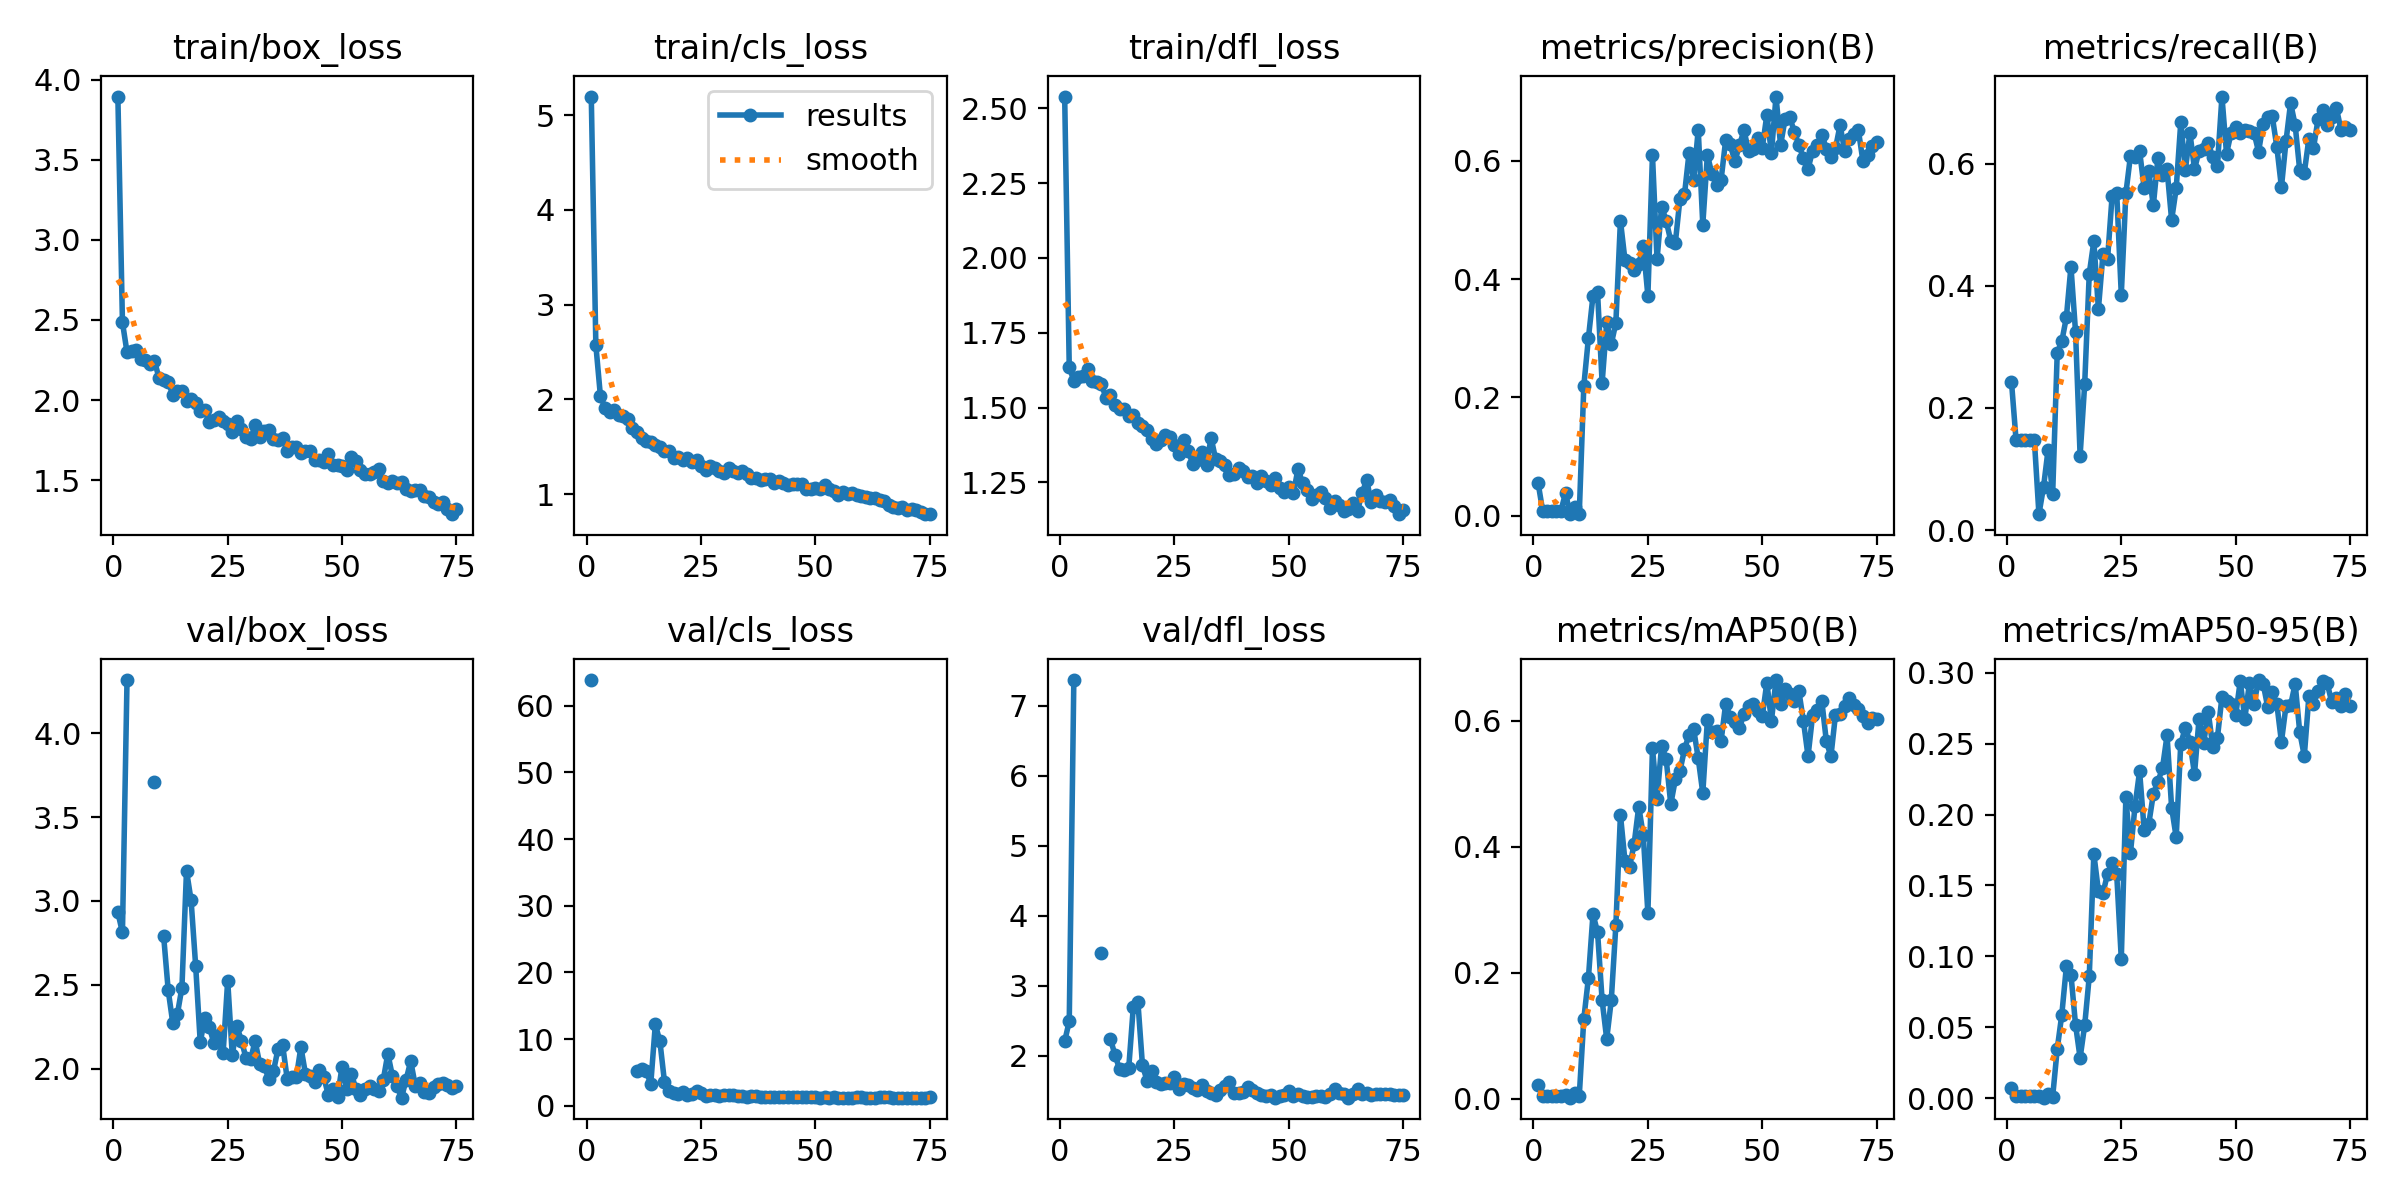

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

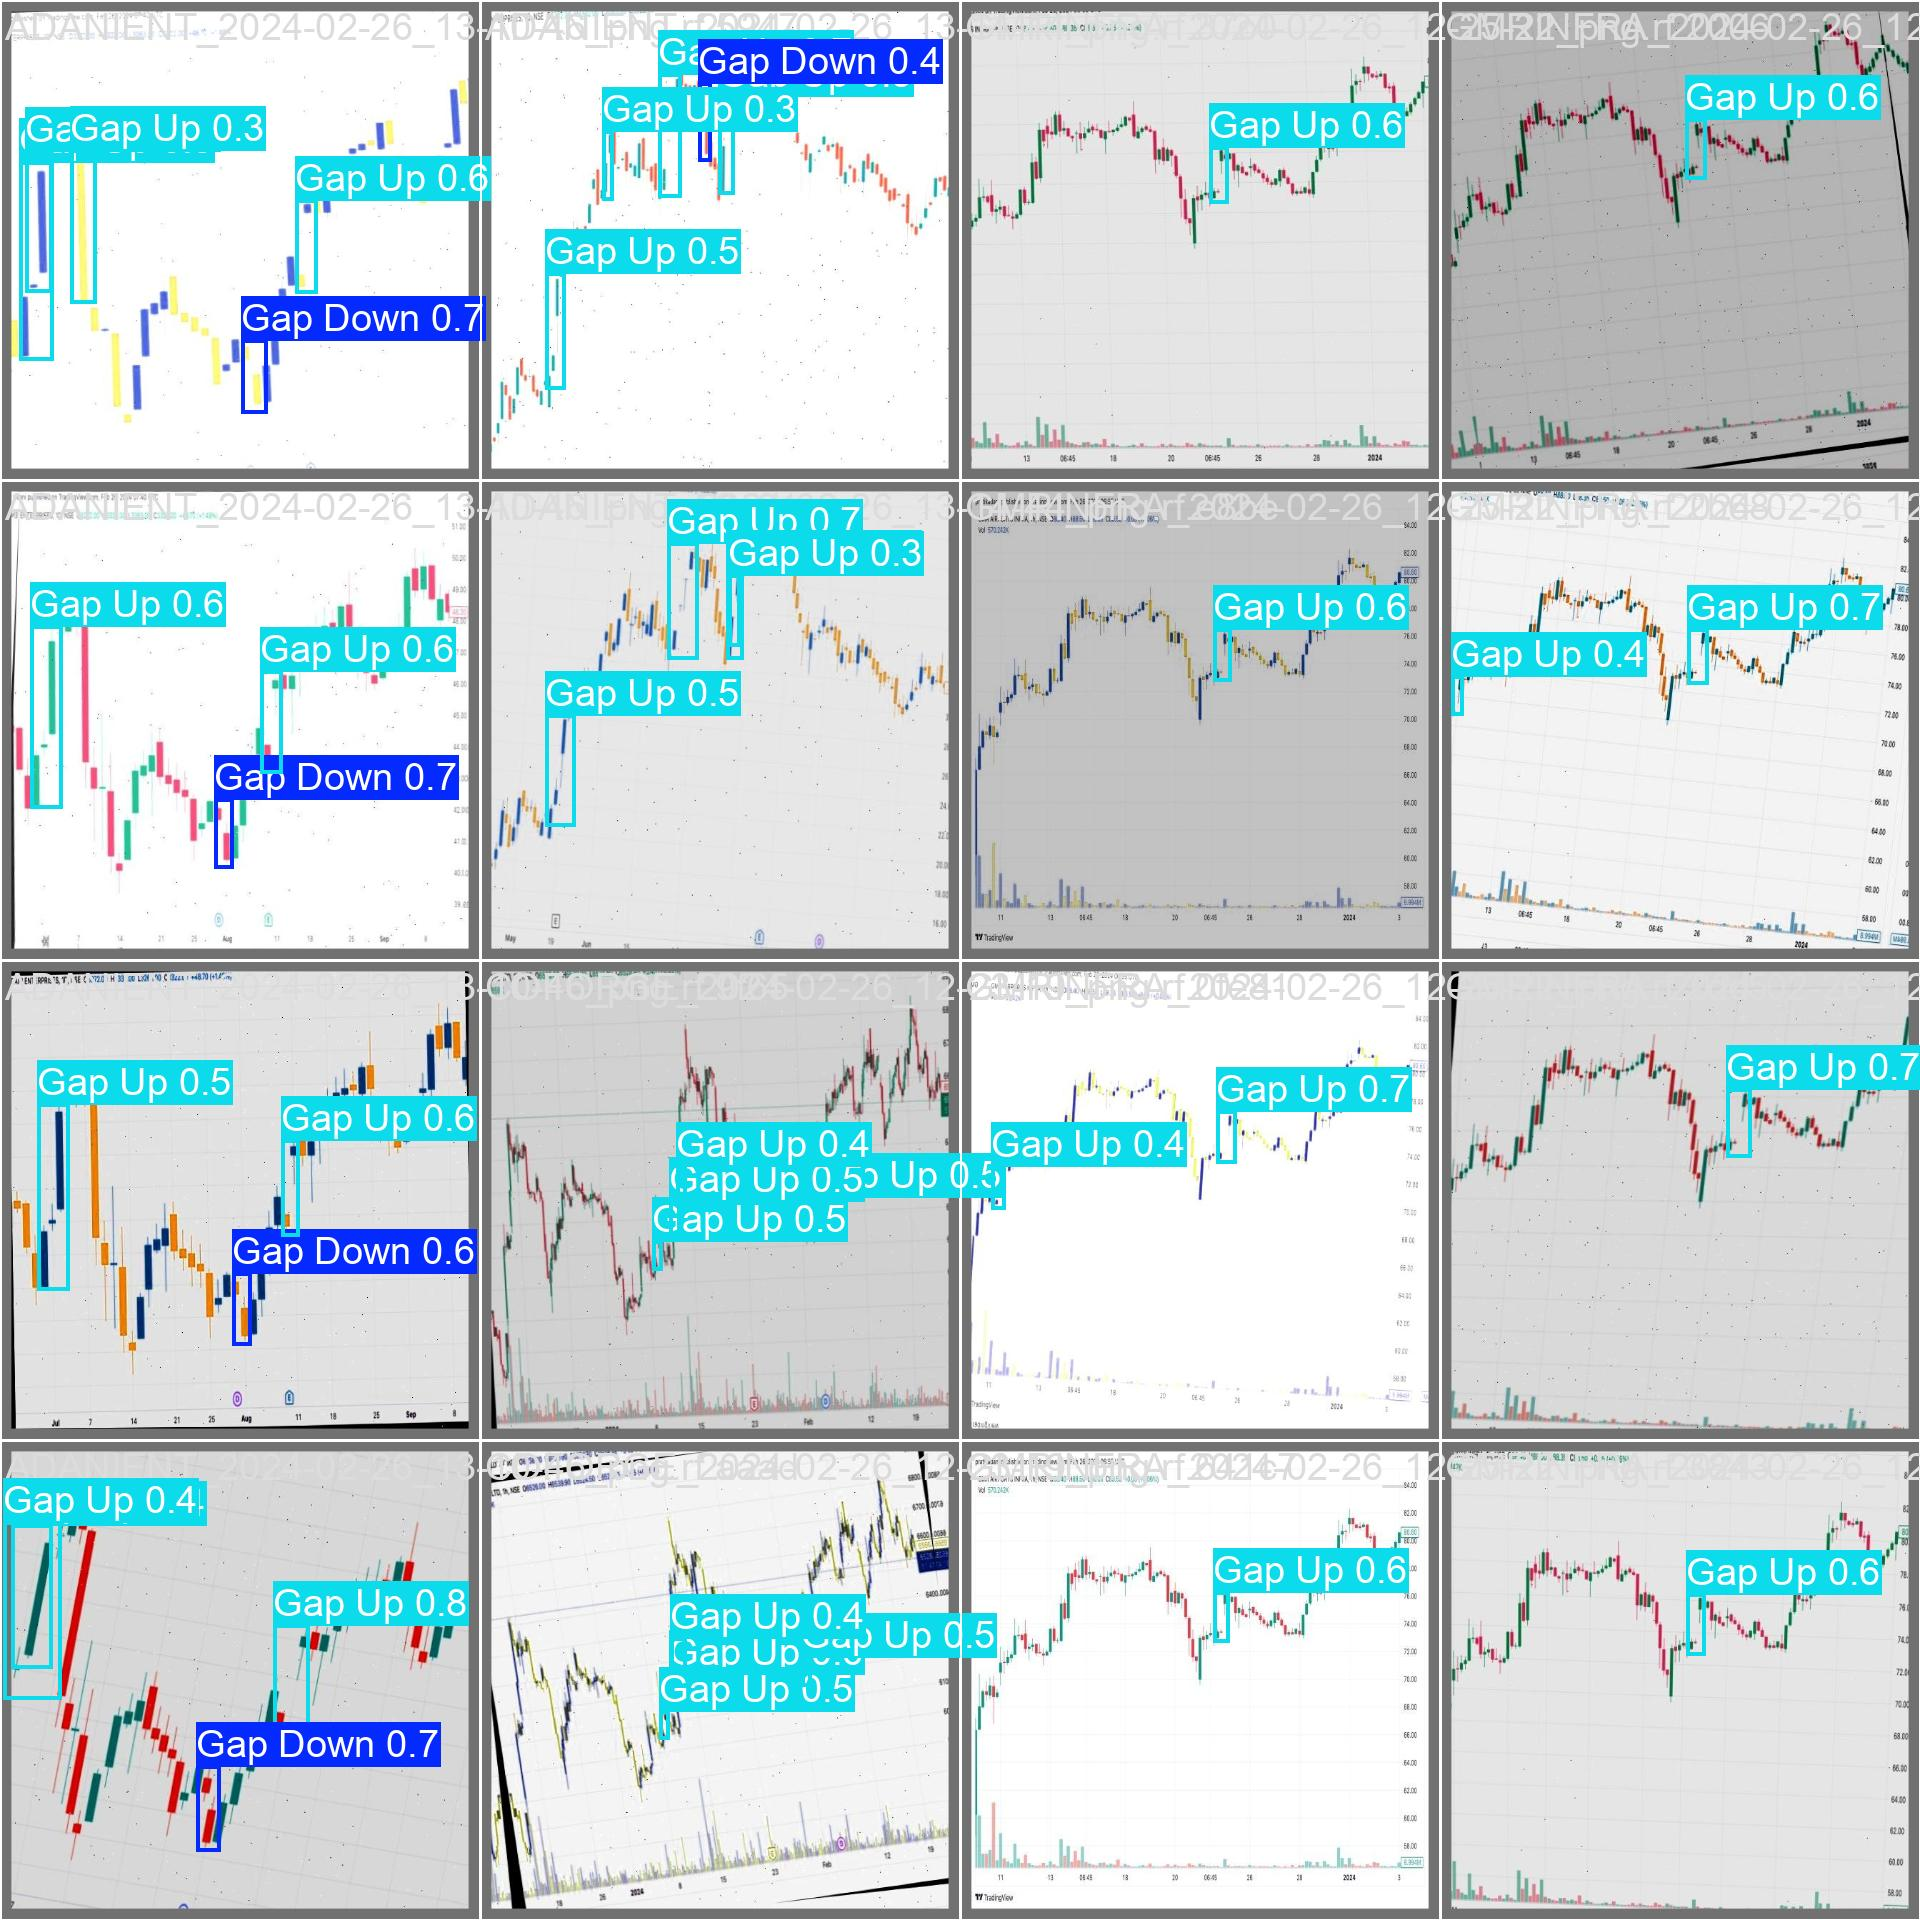

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/datasets/gap-pattern-3/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.67it/s]
                   all         43        225      0.668      0.652      0.661      0.297
              Gap Down         24         87      0.615      0.667      0.621      0.293
                Gap Up         42        138      0.721      0.638      0.701      0.301
Speed: 3.1ms preprocess, 10.9ms inference, 0.0ms loss, 17.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
!yolo detect predict model={HOME}/runs/detect/train3/weights/best.pt source='/content/test img.png' imgsz=640

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/test img.png: 320x640 (no detections), 59.5ms
Speed: 6.4ms preprocess, 59.5ms inference, 28.0ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
